In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
sale=pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'PIN':'string'})
res_bldg=pd.read_csv(data_folder+'EXTR_ResBldg_final.csv',dtype={'PIN':'string'})

df = pd.merge(sale, res_bldg, on='PIN', how='inner')

In [3]:
for column in df.columns:
    print(column)

Unnamed: 0_x
ExciseTaxNbr
Major_x
Minor_x
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot
PlatBlock
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
PIN
Unnamed: 0_y
Major_y
Minor_y
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost


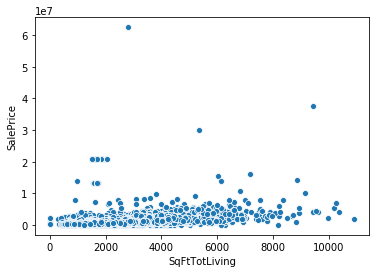

In [4]:
sns.scatterplot(df.SqFtTotLiving, df.SalePrice)

In [5]:
z = np.abs(stats.zscore(df.SalePrice))
no_outliers = df[z < 3]

no_outliers

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,0,0,0,1989,0,0,0,0,3,0
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,1,0,0,1994,0,0,0,0,3,2500
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,0,0,0,1986,0,0,0,0,3,0
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,1,0,0,1980,0,0,0,0,3,0
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,28766,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,0,0,0,1989,0,0,0,0,3,0
28767,28767,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,0,0,0,1944,0,0,0,0,4,0
28768,28768,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,1,0,1,1958,0,0,0,0,3,0
28769,28769,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,0,0,0,1947,2009,0,0,0,3,0


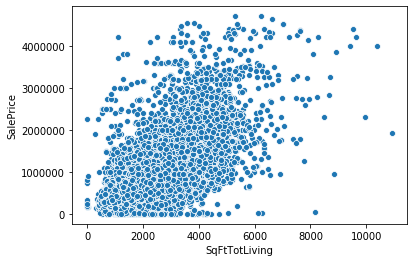

In [6]:
sns.scatterplot(no_outliers.SqFtTotLiving, no_outliers.SalePrice)

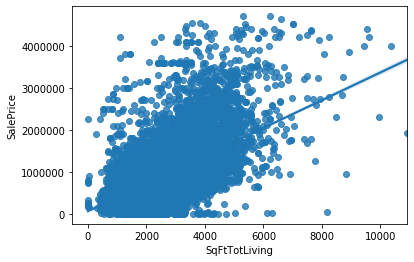

In [7]:
sns.regplot(no_outliers.SqFtTotLiving, no_outliers.SalePrice)

These might be usable, let's try scaling the data

In [9]:
from sklearn import preprocessing

In [11]:
scaled_prices = preprocessing.scale(no_outliers.SalePrice)

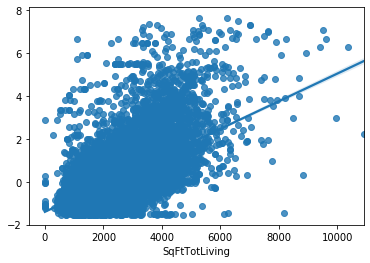

In [12]:
sns.regplot(no_outliers.SqFtTotLiving, scaled_prices)

In [13]:
scaled_size = preprocessing.scale(no_outliers.SqFtTotLiving)

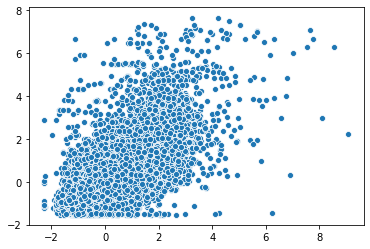

In [16]:
sns.scatterplot(scaled_size, scaled_prices)

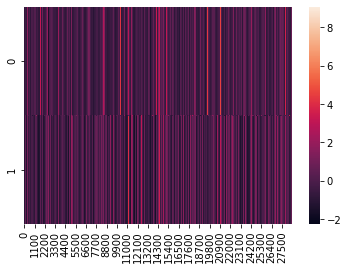

In [19]:
sns.heatmap([scaled_prices, scaled_size])

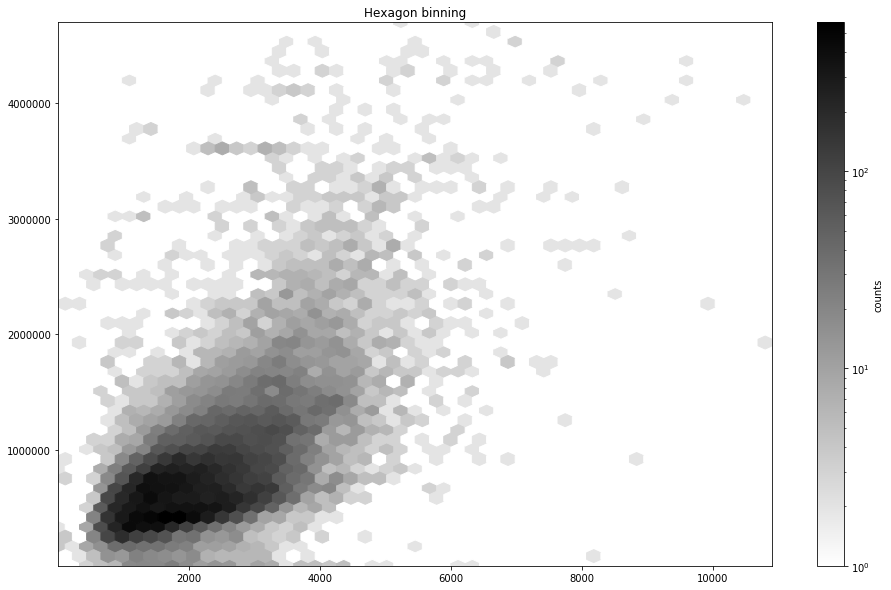

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(16, 10))


hb = ax.hexbin(x, y, gridsize=50, cmap='binary', bins = 'log')
ax.axis([xmin, xmax, ymin, ymax])

cb = fig.colorbar(hb, ax=ax)


#set text
ax.set_title("Hexagon binning")
cb.set_label('counts')

#set font

plt.savefig('hex_bin.png', transparent=True)

In [159]:
import numpy as np
import matplotlib.pyplot as plt

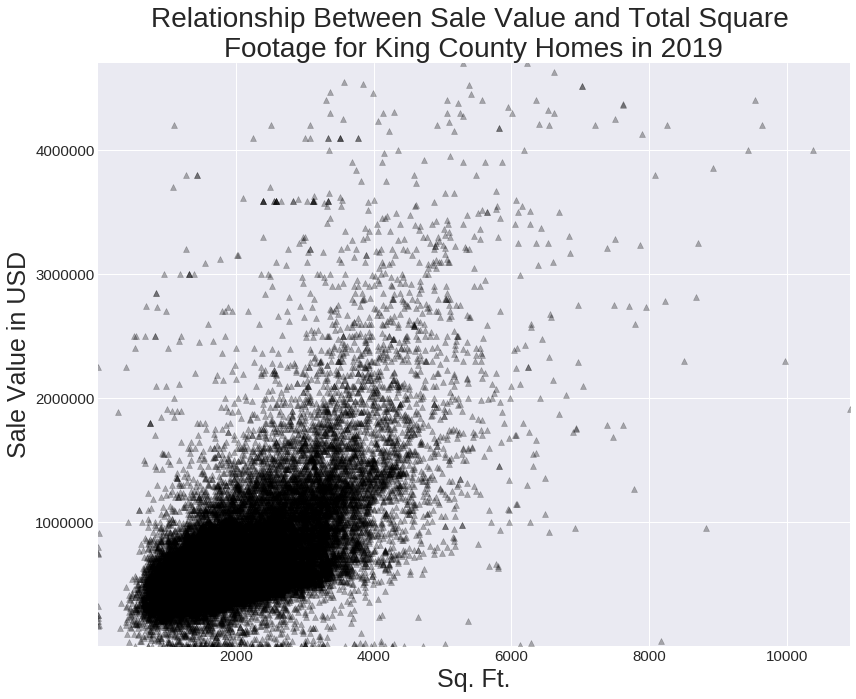

In [166]:
plt.style.use('seaborn-darkgrid')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])



#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('price_sq_ft_transparent.png', transparent=True)

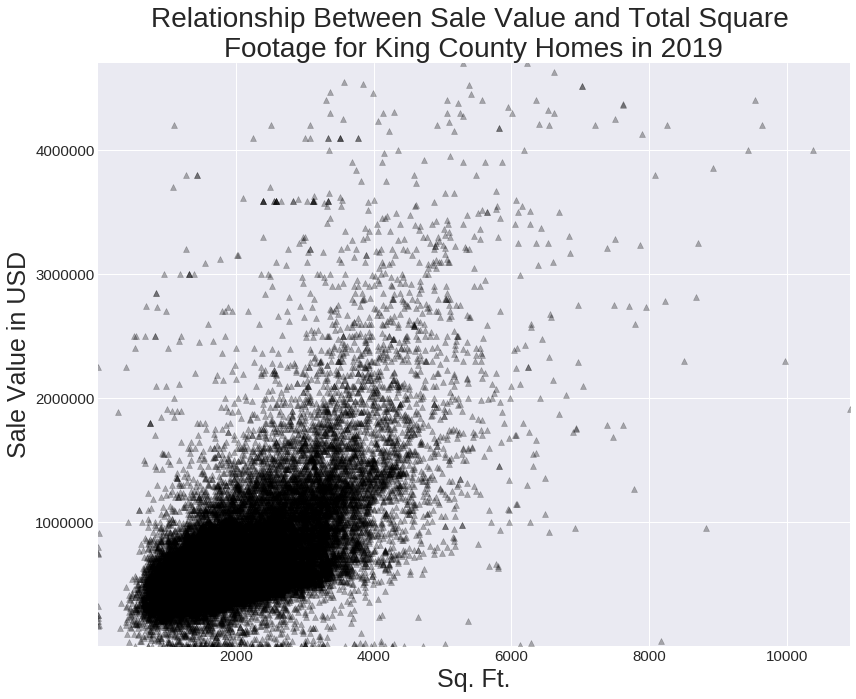

In [167]:
plt.style.use('seaborn-darkgrid')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])



#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('price_sq_ft.png')